# Preprocessing Time Series


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Time series: Recap

A time series is a **series of data points given in time order**. 
   
In standard machine learning:
   
   * no specific ordering of the data
   * data points are considered to be **independent** from each other.
   
In time series analysis:
   
   * a specific structure and dependency of the data, given by its **chronological nature**
   * e.g. recent values are potentially more relevant than older ones for forecasting



## Overview

Much like any other dataset within ML which needs proper cleaning and preprocessing, time series data is no different. There are several common preprocessing steps which we will explore in this module.

* Handling missing data
* Decomposing time series 
* Resampling 
* Parsing custom date formats
* Smoothing and shifting time series 
* Differencing time series 

## Missing Data
* Missing data are common in time series
* Common reasons:
 - data corruption
 - unavailable data
 - data recorded at inconsistent intervals (e.g. data recorded every 2 hours has missing data when compared to hourly data).

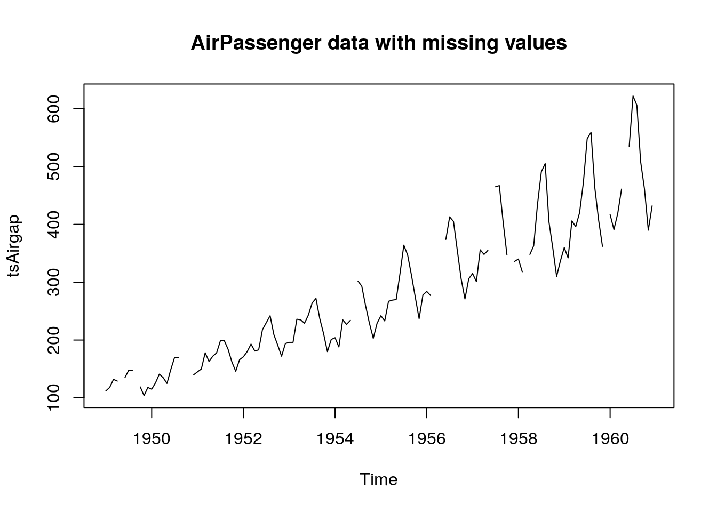

### Handling Missing Sequence Data
Different ways to handle missing sequence data are as follows:

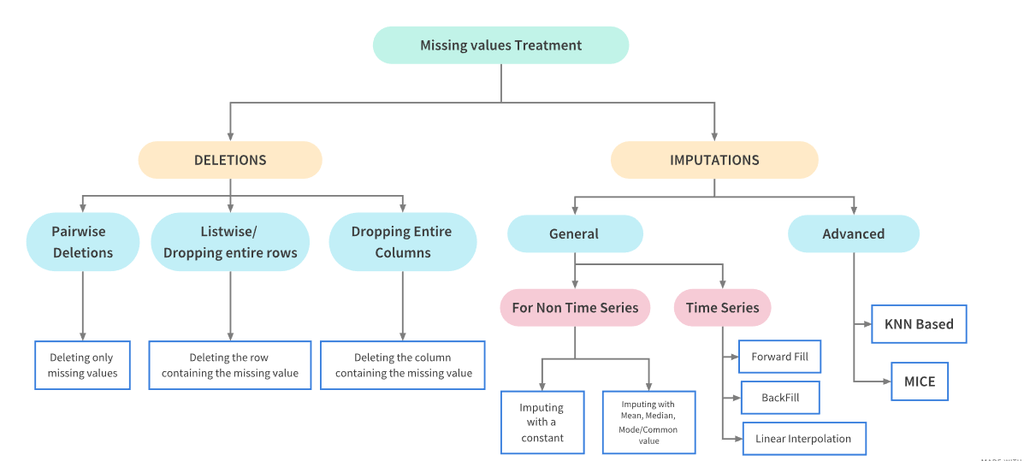

### Handling Missing Sequence Data
Deletion:
* Missing values are removed from the dataset by deleting cells, entire rows, or entire columns/variables

Imputation: 
* Replace missing values with hard-coded or algorithm-based values
* Common options:
    - A constant, distinct value that has meaning within the domain.
    - Random sample imputation (replace `NaN` with randomly selected observations from the remaining data)
    - Mean imputation
    - Median imputation
    - Mode imputation

## Interpolation
Use predictive modeling for imputing data

Last observation carried forward (LOCF):
* Replaces each missing value with the most recent present value prior to it

Next observation carried backward (NOCB):
* Replaces each missing value with the most recent present value next to it while propagating in reverse order (from the back/end of a series)

Linear or spline interploation.

Spline: Fit low-degree polynomials to small subsets of the observations


## Choice of Method
* No approach is the best for handling missing sequence data
    * Depends on the problem, data, and domain
    * Explore each method and see what works best for a given scenario
* Spline interpolation is often preferred over polynomial interpolation
  * Minimizes error
  * Avoids the problem of Runge's phenomenon (oscillations between points when interpolating high-degree polynomials).
* Interpolation methods assume that successive observations are similar to one another.
  * They do not work well when this criterion is not fulfilled (e.g. presence of strong seasonality or noise).
* Some imputation methods are not specific to time series -- take care!

## Time series decomposition analysis: Recap

* **Trend**: a long term increase or decrease in the data
* **Seasonality**: a cyclic pattern in the data (e.g.: days of the week, quarters of the year)
* **Noise**: a non deterministic element in the data, i.e. random fluctuations

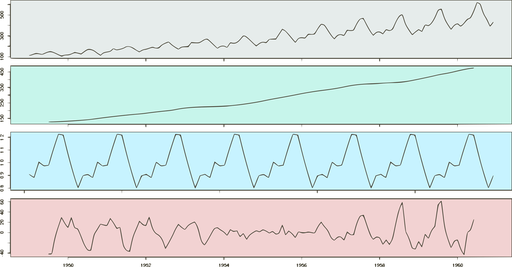
Let's explore this with our bikes dataset.

## Bikes dataset

We will work now with the multivariate time series "bikes" dataset. The dataset includes the **number of bikes rented per month and the average metereological conditions**. 

* Load the data `bikes.csv`
* Specify that you want to parse the column `'dates'` as dates using `parse_dates=['dates']`
* Use the dates as the index column


In [2]:
bikes = pd.read_csv("data/bikes.csv", parse_dates=["date"], index_col="date")
bikes.head()

,temperature,humidity,windspeed,count
date,,,,
2011-01-03,2.716070,45.715346,21.414957,120.0
2011-01-04,2.896673,54.267219,15.136882,108.0
2011-01-05,4.235654,45.697702,17.034578,82.0
2011-01-06,3.112643,50.237349,10.091568,88.0
2011-01-07,2.723918,49.144928,15.738204,148.0


We are going to be working with the bikes dataset, which contains the amount of bikes rented (represented in count) for different dates and also some metereological variables (temperature, humidity and windspeed). 

<Axes: xlabel='date'>

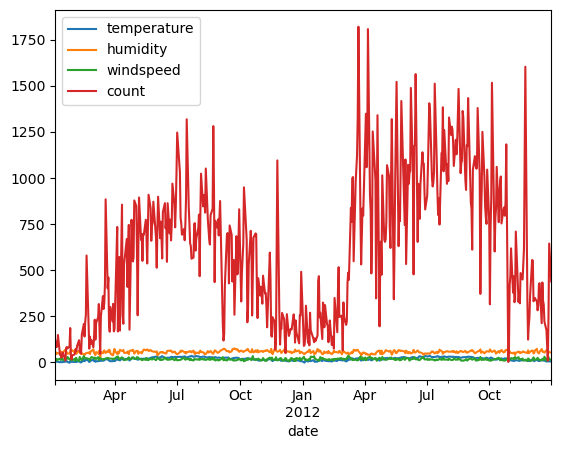

In [3]:
bikes.plot()

We can use the seasonal_decompose function from statsmodels to decompose a time series. With the below function we create plots of the results.

In [4]:
def ts_decompose(y, model="additive"):
    result = seasonal_decompose(y, model=model)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    axes[0].set_title("Decomposition for " + model + " model")
    axes[0].plot(y, "k", label="Original " + model)
    axes[0].legend(loc="upper left")

    axes[1].plot(result.trend, label="Trend")
    axes[1].legend(loc="upper left")

    axes[2].plot(
        result.seasonal,
        "g",
        label="Seasonality: " + str(round(result.seasonal.mean(), 4)),
    )
    axes[2].legend(loc="upper left")

    axes[3].plot(
        result.resid,
        "r",
        label="Residuals: " + str(round(result.resid.mean(), 4)),
    )
    axes[3].legend(loc="upper left")
    plt.show(block=True)
    return

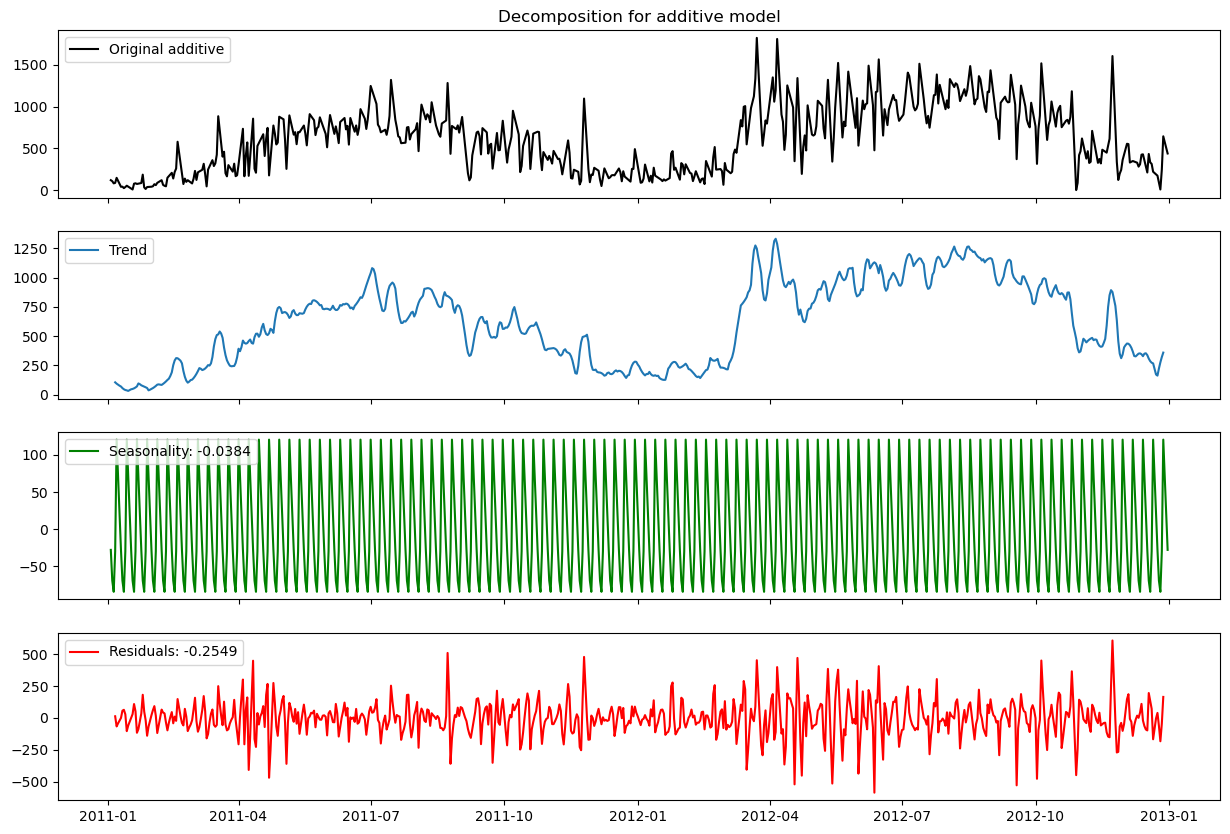

In [5]:
ts_decompose(bikes["count"])

## Resampling

Resampling involves changing the frequency of your time series observations:
* **Upsampling**: increase the frequency of the samples, (e.g. from days to hours)
* **Downsampling**: decrease the frequency of the samples (e.g. from days to weeks)

We use resampling because we have observations at the wrong frequency:
* They may be too granular or not granular enough!

We mentioned that we are going to be focusing on preprocessing time series in this unit. The first idea we are going to see is resampling. 

Time series are usually given in equally spaced time intervals. For example, we may have a digital thermometer that collects a temperature measurement every minute. However, we may be able to program how frequent these measurements are (i.e. we can change the time intervals from 1 minute to 10 minutes or 10 seconds). 

Equivalently, we may want to change the frequency of our time series. This is called resampling. In the case of the thermometer we may be able to change the data collection protocol, but this is often not the case in many other real-world applications (specially if observations were collected in the past). However, we still have ways to change the frequency of our observations. There are two main techniques here: 1) Upsamling, where we increase the frequency of the sampling (e.g. from days to hours) and 2) downsampling, where we decrease the frequency of the samples (from days to weeks). 

Usually we would use resampling because observations are at the wrong frequency and we may want to make them more or less granular. This in many cases may depend on the application itself.

## Downsampling

* Performs **data aggregation**. 
* It can be considered as a step to reduce noise (by removing the high frequency part of the signal) or compress the signal.

<br>

✏️ For example: we may observe hourly data but only be interested in daily measurements. Then one approach would be to compute the mean over all hourly measurements.


Let's take a look at down sampling. Basically, downsampling performs data aggregation (e.g. aggregate all the minute data to produce an hourly mean). It is often used as a step to reduce noise and random fluctuations. 

## Downsampling example

We can aggregate time series by resampling the points on a coarser time level. 

* Use the `.resample` to get the data corresponding to monthly averages
* Display the `temperature` time series for the monthly averages. 


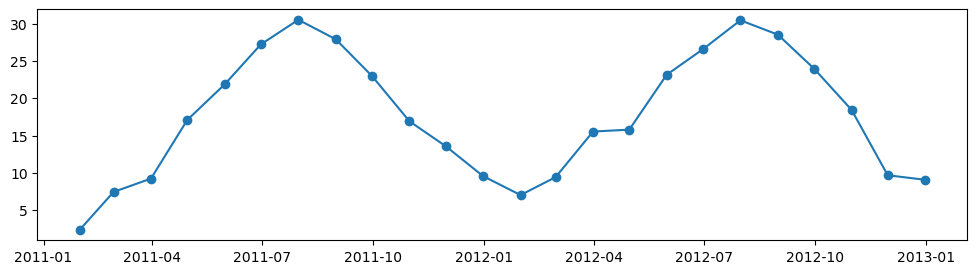

In [6]:
bikes_monthly = bikes.resample("M").mean()

plt.figure(figsize=(12, 3))
plt.plot(bikes_monthly.temperature, "-o")

Let's see an example. We have the bikes dataframe from before. We would like to resample the signal to report the average per month. Note the argument of the resample function (M for month) and the need to apply .mean after.

We are interested in plotting the difference in temperature. You can probably see how this variable is now much smoother (compare them in your jupyter notebook if necessary). 

## Downsampling example

Now let's resample the humidity variable by the mean of each week

<Axes: xlabel='date'>

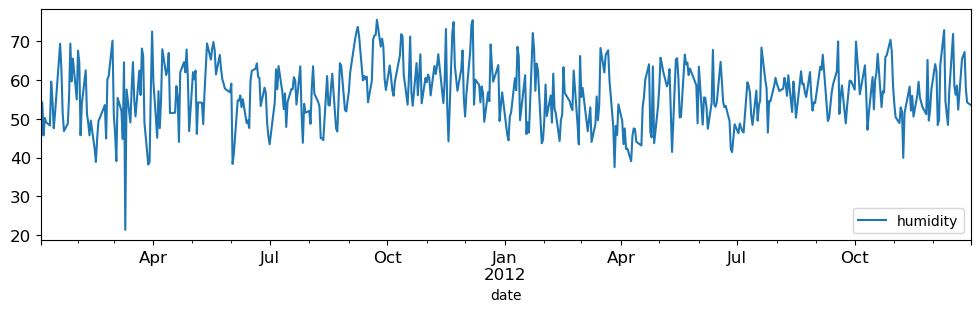

In [7]:
# we plot the original humidity variable
bikes.plot(y="humidity", figsize=(12, 3), fontsize=12)

Now, let's check what happens with the humidity variable. Let's first plot the original one. 

## Downsampling example

Now let's resample the humidity variable by the mean of each week. Can you observe any visible differences?

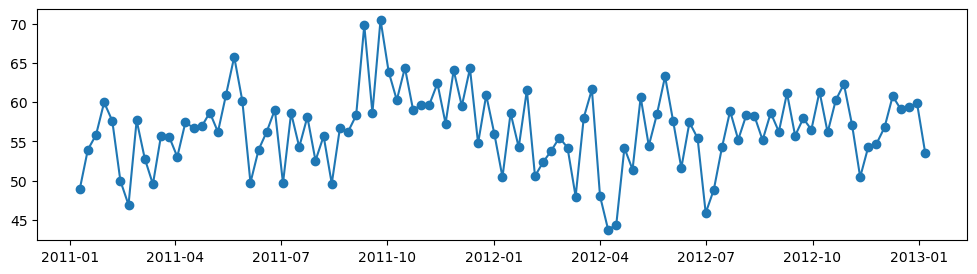

In [8]:
# upsampling
bikes_weeks = bikes.resample("W").mean()
plt.figure(figsize=(12, 3))
plt.plot(bikes_weeks.humidity, "-o")

Now let's resample by the mean of the week. What can you observe here? 

Firstly, again, the signal looks smoother. But we can also see that the axis of the plot have changed significantly. This is because it has removed (or more like filtered, smoothed) an outlier with a reported humidity of 20 (around the first month of April).

## Upsampling

* This typically requires more care than downsampling, as we are **essentially interpolating
between observations** to guess what the measurements would have been in between. 
* Upsampling can be done using a model to restore the data. 
* Upsampling is also useful when data is **unevenly sampled** and we require an evenly sampled time series. 

<br>

✏️ For example: if we observe data hourly but need measurements every 30 minutes, then one approach could be to simply average the measurements before and after (a linear interpolation model).

Now let's take a look at upsampling. This poses a higher complexity, as we are interpolating between observations to infer what measurements we could have had in between. For example, if we observe data hourly but need measurements every 30 minutes we could simply average the measurements before and after. This is called a linear interpolation model. This would for example be a good approach for temperature, but not for the count of bikes rentals. This is because bike rentals would basically report the sum of rentals per hour, so interpolating in between would indicate more sales than originally. However, a reasonable assumption here would be that every 30 min one rented half of the bikes that were rented during that hour. We will see this more clearly with an example. 

So, the main takeaway here is that upsampling is usually done with a model to restore the data (e.g. linear interpolation). 

Finally, upsamling is also useful when data is unevenly sampled. For example, this is often the case with trading data, where we may get simply data at different times in the form of bids and asks, which ultimately affect the selling/buying prices. (This is, someone may put a bid or an ask to buy/sell a certain stock, which is realised only if there are users that may want the opposite). 

## Upsampling example

Let's upsample all variables every 6 hours and visualise `humidity` using `pd.DataFrame.ffill` (forward fill, which propagates the last valid observation forward). 

**Question**: What do you think of using this upsampling strategy?

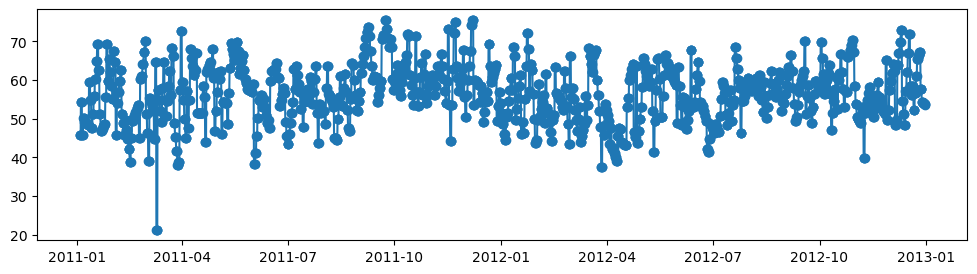

In [9]:
bikes_6h = bikes.resample("0.25D").ffill()
plt.figure(figsize=(12, 3))
plt.plot(bikes_6h.humidity, "-o")

Let's take a look at an upsampling example. We want to resample our variables every 6h (hence the 0.25D). This function would usually create the missing values but fill them with NaNs, so we need to use a function to do the interpolation. The function we chose in this case is called ffill, which propagates the last valid observation forward to any values with NaN). We then show how the values would look like for humidity. 

Question: What do you think of this interpolation idea? 

Answer: This example might represent well the difficulty in using upsampling for some variables, since here it’s going to be dividing the day in 6h intervals and filling the unknown values with the last observation. This may be acceptable for humidity and temperature (assumption being that these do not change during the day) but definitely not for count. 

## Parsing custom date formats

When you loaded the bikes dataset, Pandas automatically detected the format of the dates for you.
This might often "just work" but there often will be cases where you need to be careful about parsing and might have to do it yourself.

Load the data `NZAlcoholConsumption` and have a look at it without specifying a column to parse for dates. 

In [10]:
alcohol_consumption = pd.read_csv("data/NZAlcoholConsumption.csv")
alcohol_consumption.head()

,DATE,TotalBeer,TotalSpirits,TotalWine
0,2004Q3,3.135,1.746,2.318
1,2000Q1,2.957,1.097,1.486
2,2006Q1,3.027,1.443,2.141
3,2000Q3,2.798,1.496,1.844
4,2011Q3,2.865,2.482,2.704


When loading a dataset with pandas there might be occasions in which the parsing might not recognise the date notation. For example, in the case of this dataset that deals with alcohol consumption the dates are given in year and quarters, instead of the standard of day, month and year. 

We may thus need a function to parse the dates given. 

In [11]:
import re


def parse_quarter(string):
    """
    Converts a string from the format YYYYQN in datetime object at the end of quarter N.
    """

    # Note: you could also just retrieve the first four elements of the string
    # and the last one... Regex is fun but often not necessary
    year, qn = re.search(r"^(20[0-9][0-9])(Q[1-4])$", string).group(1, 2)

    # year and qn will be strings, pd.datetime expects integers.
    year = int(year)

    date = None

    if qn == "Q1":
        date = pd.Timestamp(year, 3, 31)
    elif qn == "Q2":
        date = pd.Timestamp(year, 6, 30)
    elif qn == "Q3":
        date = pd.Timestamp(year, 9, 30)
    else:
        date = pd.Timestamp(year, 12, 31)

    return date


# Check that it works!
print(parse_quarter("2000Q3"))  # should show 2000-09-20 00:00:00

2000-09-30 00:00:00


### Giving the parser to pandas

Pandas can parse dates using a custom made parser. For this just specify your function in the `date_parser` option.

In [12]:
# reload the data using your parser, set the index to the date
alcohol_consumption = pd.read_csv(
    "data/NZAlcoholConsumption.csv",
    parse_dates=["DATE"],
    date_parser=parse_quarter,
    index_col="DATE",
)
alcohol_consumption.sort_index(inplace=True)
alcohol_consumption.head()

/var/folders/pv/t6tzg3zn4nj1ssyv4c1v9pzw0000gn/T/ipykernel_7054/4029768688.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  alcohol_consumption = pd.read_csv(


,TotalBeer,TotalSpirits,TotalWine
DATE,,,
2000-03-31,2.957,1.097,1.486
2000-06-30,2.823,1.309,1.915
2000-09-30,2.798,1.496,1.844
2000-12-31,3.997,1.810,2.808
2001-03-31,3.037,1.240,1.287


Let's see now how would we have to specify the parser when loading the file. In this case we have a function named parse_quarter, that you will have to define in our next notebook and we can simply pass it with date_parser. We can see now that each quarter is specified by a date in our loaded dataframe. 

## Jupyter Exercise

Resampling and parsing

Open `time-series-resampling-parsing.ipynb`

Let's do now some simple exercises on resampling and parsing.

## Smoothing

Big difference in time series: **not all data are equal!**

<br>

**Smoothing is a technique applied to remove the fine-grained variation between time steps** (similar to downsampling). The hope of smoothing is to remove noise and better expose different processes in the signal. To smooth the signal we use a moving/sliding window.
    
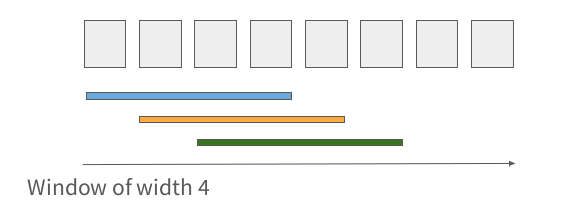

Moving windows involves applying a function on repeated fixed-width “slices” (window)
of the data sliding along in the direction of the data.

We will be introduced now to the concept of smoothing. The main idea behind this concept is that when forecasting not all data might be considered equally useful. For example, if you aim to predict what is happening at time t, the observation at t-1 would usually be more relevant than the observation at t-5. 

This is like saying, if I want to forecast the temperature for the next hour, the temperature right now should ideally be more useful than the temperature 5 hours ago. 

Smoothing is a technique that removes fine grain variation in a time series, in a similar way to downsampling. To smooth the signal we normally use what is called a moving or sliding window. This is represented in the figure shown, where we have a window (in this case of size 4) that slides through the data. A function is then applied to the data inside the window (e.g. the average) and this gives us our smoothed data.

## Moving Average

* **One of the simplest smoothing techniques**
* The window slides along the time series
* Creates a new series by calculating the average of fixed-width windows
* Better expose the trend of the data
* **The same principle can be used for moving standard deviation, moving median, etc**.

Let's see now one of the simplest smoothing techniques. This is called moving average. The window, in the same way that we saw before, slides along the time series and it creates a new series by calculating the average of the data within the window. The idea is that this may reduce the noise and thus better expose the trend of the data. The same principle can equally be used for moving standard deviation, median, etc.

## Moving Windows

Moving window of 4 using the `rolling` method from `pd.Series` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html#pandas.Series.rolling))


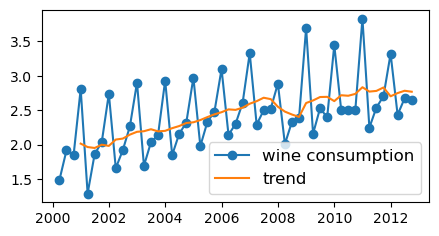

In [13]:
plt.figure(figsize=(5, 2.5))
plt.plot(alcohol_consumption.TotalWine, "-o", label="wine consumption")
rolling_mean = alcohol_consumption.TotalWine.rolling(window=4).mean()
plt.plot(rolling_mean, label="trend")
plt.legend(fontsize=12)

Let's check now how to do this in pandas. We have a function called rolling which would implement our moving window for us. We need to specify the size of the window as one of the arguments of the function. In the same way than we did before for resampling, here we also need to specify a function to apply to these windows. In this case we are using the average. In the plot you can see the differences between the original data and the smoothed one. It certainly removes the peaks, but would this not be highly dependent on the size of the window?

## Exponential moving averages

Also called exponential smoothing: In this case, instead of just giving the same weight to all points within the window we give them exponential weights, which effectively means that **more recent observations within the window have a bigger impact** (`pd.DataFrame.ewm`, [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html)).

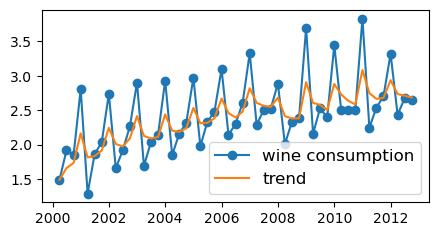

In [14]:
plt.figure(figsize=(5, 2.5))
plt.plot(alcohol_consumption.TotalWine, "-o", label="wine consumption")
exp_rolling_mean = alcohol_consumption.TotalWine.ewm(
    span=4, adjust=False
).mean()
plt.plot(exp_rolling_mean, label="trend")
plt.legend(fontsize=12)

Another very relevant and used in practice smoothing technique is the concept of exponential moving averages. This implements the idea mentioned before that not all data has the same importance for forecasting and more recent data might be more important. 

An exponential moving average gives different weights to the points within the window. In this case exponential weights, meaning that we give a higher weight to more recent observations. This can be done using the function ewm, which implements exponential weighted functions. We can see a clear difference with respect to the previous plot. 

## Jupyter Exercise

Exploring moving windows

Open `time-series-windows.ipynb`

Let's explore now moving windows with a few exercises

## Shifting time series

Sometimes we want to shift time series data en masse.

* To remove a known consistent latency
* To help identify causal relationships more easily
* To create lag features

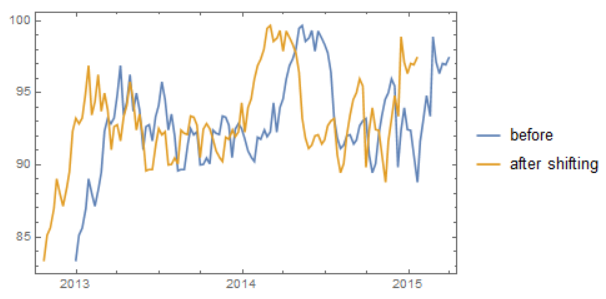

Another preprocessing technique that we might consider is to shift the time series. This obviously does not change the data at all, but we might want to do this for different reasons. For example if we know there is a consistent latency. 

## Shifting example
Shift the whole dataframe with a period of 3 (`pd.DataFrame.shift`, [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)).

In [15]:
bikes.shift(periods=3)

,temperature,humidity,windspeed,count
date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,NaN,NaN,NaN,NaN
2011-01-05,NaN,NaN,NaN,NaN
2011-01-06,2.716070,45.715346,21.414957,120.0
2011-01-07,2.896673,54.267219,15.136882,108.0
...,...,...,...,...
2012-12-27,4.451573,65.482835,9.211711,174.0
2012-12-28,4.750319,66.377012,17.747048,91.5
2012-12-29,5.049065,67.271190,26.282385,9.0


To shift the data we can simply use the shift function for dataframes. We need to pass an argument that indicates how much we want to shift. Checking the result when shifting the bikes dataset we can see that it creates a number of data points equivalent to the shifting period equal to NaNs.

## Stationarity: Recap

A common assumption in many time series analysis techniques is that **the data are stationary**. 

<br>
A stationary process has the property that **the mean, variance and autocorrelation structure do not change over time**. Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations (seasonality). There are statistical tests to check for stationarity (same for correlation, trend, etc.).

Generally, a very common assumption made by time series analysis techniques is that data is stationary, so this is also a very common preprocessing step (together with the ones we have seen before). A stationary process has the property that the mean, variance and autocorelation do not change over time. So, for our purpose a time series without trend, constant variance and no seasonality. 

## Differencing

Differencing is a **common preprocessing step to remove non-stationarity** (`pd.DataFrame.diff`, [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)).

Differencing is performed by subtracting a previous observation from the current observation. Here with a lag of 1:
$$\hat{x}_t = x_t - x_{t-1}$$

Using differencing can help remove the trend (lag of 1) and seasonality (lag of m) and expose the noise in the time series.

The most common way to make the data stationary is to compute the difference with previous steps. Differencing is performed by substracting a previous observation from the current one, as indicated in the equation for a lag of one. However different lags could be used for different purposes (e.g. a lag of 1 to remove the trend, or a lag of m to remove seasonality). 

## Differencing

Time series for `TotalWine` and the differenced one (with lag 1). What do you observe? 

In [16]:
plt.figure(figsize=(5, 3))

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

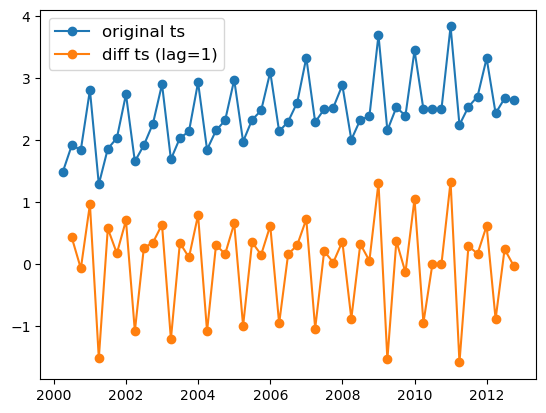

In [17]:
plt.plot(alcohol_consumption.TotalWine, "-o", label="original ts")
plt.plot(alcohol_consumption.TotalWine.diff(1), "-o", label="diff ts (lag=1)")
plt.legend(fontsize=12)

Let's check an example of differencing. We are using here the function diff with a lag of 1. What can you observe from the plot? We can see that the scale of the plot changes, as a consequence of substracting the previous value. 